In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
#pckage to split data into train and test
from sklearn.model_selection import train_test_split
# polynomial feature
from sklearn.preprocessing import PolynomialFeatures
# calculating confusion matricss
from sklearn import metrics
#for labeling
from sklearn import preprocessing
#for roc and auc curve
from sklearn.metrics import roc_curve, auc
#libraries for decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image   #to view the image of the tree
from sklearn.tree import export_graphviz
import pydotplus
# for clustring
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree


In [2]:
# mainly 3 types of segmentation are used for customer segmentation:
# Behavioural Segmentation
# Attitudenal 
# demographic

In [3]:
# reading data set
retail = pd.read_csv('Online+Retail.csv',sep=',',encoding='ISO-8859-1',header=0)

In [4]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
# 
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],infer_datetime_format=True)

In [6]:
# sanity check
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [8]:
retail.shape

(541909, 8)

In [10]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# PRELIMINARY DATA CLEANING

In [12]:
#N/A handling count of missing values
retail.isnull().values.sum()

136534

In [14]:
# calculate the percentage of missing values
retail.isnull().sum()*100/retail.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [15]:
# dropping the na  values
order_wise = retail.dropna()

In [16]:
# sanity check
order_wise.shape
order_wise.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
# RFM analysis Recency Frequency and Monetary

In [20]:
# rfm implementation
# monetary
# create a new varable called amount
amount = pd.DataFrame(order_wise.Quantity * order_wise.UnitPrice,columns = ['Amount'])

In [22]:
amount.head()

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [25]:
# merging amount in order_wise
order_wise = pd.concat(objs=[order_wise,amount],axis=1,ignore_index=False)

In [26]:
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [27]:
# Now sort the data in order of customer id .Next, create a new vector -monetary-which gives the aggregated purchase amount 
# for each cutomer
# this data frame monetary is the M of the RFM framework


In [32]:
# Monetary Function
monetary = order_wise.groupby('CustomerID').Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [33]:
# next lets compute the frequency  for purchase of each customer ,ie F for RFM

In [35]:
# frequency function
frequency = order_wise[['CustomerID','InvoiceNo']]

In [36]:
frequency.head()

,CustomerID,InvoiceNo
0,17850.0,536365
1,17850.0,536365
2,17850.0,536365
3,17850.0,536365
4,17850.0,536365


In [43]:
k = frequency.groupby("CustomerID").InvoiceNo.count()
k= pd.DataFrame(k)
k = k.reset_index()
k.columns = ['CustomerID','Frequency']
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [44]:
# finaly merge this data frame with frequency of each customer into ur earlier data set containing monetary


In [45]:
# creating master data set
master = monetary.merge(k, on = 'CustomerID', how= 'inner')
master.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [46]:
# create recency function
recency = order_wise[['CustomerID','InvoiceDate']]

In [47]:
recency.head()

,CustomerID,InvoiceDate
0,17850.0,2010-01-12 08:26:00
1,17850.0,2010-01-12 08:26:00
2,17850.0,2010-01-12 08:26:00
3,17850.0,2010-01-12 08:26:00
4,17850.0,2010-01-12 08:26:00


In [48]:
maximum = max(recency.InvoiceDate)
maximum = maximum + pd.DateOffset(days=1)
recency['diff'] = maximum - recency.InvoiceDate
recency.head()

C:\Users\AKSHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,InvoiceDate,diff
0,17850.0,2010-01-12 08:26:00,698 days 08:53:00
1,17850.0,2010-01-12 08:26:00,698 days 08:53:00
2,17850.0,2010-01-12 08:26:00,698 days 08:53:00
3,17850.0,2010-01-12 08:26:00,698 days 08:53:00
4,17850.0,2010-01-12 08:26:00,698 days 08:53:00


In [49]:
# data frame merging by recency
df = pd.DataFrame(recency.groupby('CustomerID').diff.min())
df = df.reset_index()
df.columns = ['CustomerID','Recency']
df.head()

,CustomerID,Recency
0,12346.0,327 days 07:02:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00


In [50]:
# Now the data frame recency contains the recency for each customer .Lets merge it to the rfm data set and change the format
#to required form

In [53]:
# combining all 3
RFM =k.merge(monetary, on = 'CustomerID')
RFM = RFM.merge(df,on = 'CustomerID')
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,327 days 07:02:00
1,12347.0,182,4310.00,41 days 04:54:00
2,12348.0,31,1797.24,77 days 04:06:00
3,12349.0,73,1757.55,20 days 07:28:00
4,12350.0,17,334.40,312 days 01:18:00


In [54]:
# Thus you have obtained RFM.
# however ur data prepration is still not complete 

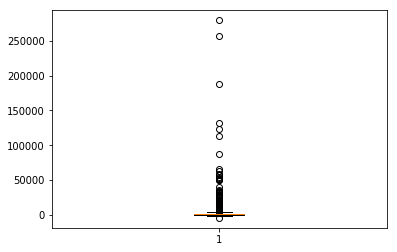

In [56]:
# outlier treatment for amount
plt.boxplot(RFM.Amount)
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3-Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

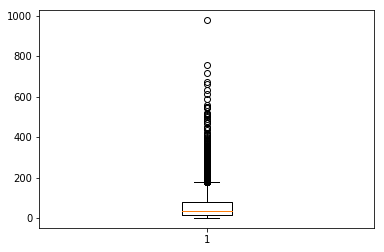

In [57]:
# outlier treatment for frequency
plt.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3-Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

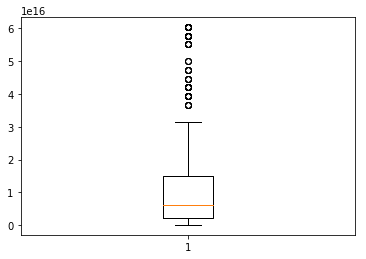

In [58]:
# outlier treatment for recency
plt.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3-Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

In [60]:
RFM.head(20)

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,327 days 07:02:00
2,12348.0,31,1797.24,77 days 04:06:00
3,12349.0,73,1757.55,20 days 07:28:00
4,12350.0,17,334.40,312 days 01:18:00
5,12352.0,95,1545.41,74 days 02:21:00
6,12353.0,4,89.00,205 days 23:32:00
7,12354.0,58,1079.40,234 days 04:08:00
8,12355.0,13,459.40,97 days 03:30:00
9,12356.0,59,2811.43,24 days 08:39:00
11,12358.0,19,1168.06,4 days 07:15:00


In [62]:
# standardise all parameters
RFM_normal =RFM.drop('CustomerID',axis=1)
RFM_normal.Recency = RFM_normal.Recency.dt.days

In [63]:
RFM_normal.Recency.head()

0    327
2     77
3     20
4    312
5     74
Name: Recency, dtype: int64

In [65]:
# The data prepration is now complete 
# standardise data


In [66]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(RFM_normal)

array([[-1.08205673, -1.0557058 ,  2.33176413],
       [-0.38875763,  1.36528882, -0.28560604],
       [ 0.61533072,  1.31182391, -0.88236644],
       ...,
       [-0.9625224 , -0.9468362 , -1.03940866],
       [-0.81908121, -0.81781456, -0.10762487],
       [ 0.54361012,  1.41922521, -1.08128658]])

#      NOW WE WILL APPLY K MEANS ALGORITHM 

In [67]:
# Find out the optimal k value

In [68]:
# sum of squared distances

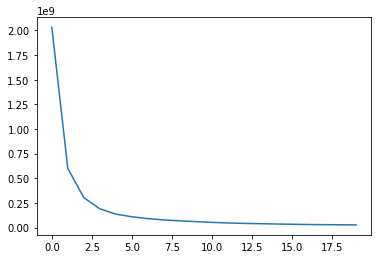

In [69]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters=num_clusters,max_iter=50)
    model_clus.fit(RFM_normal)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)

In [70]:
model_clus5 =KMeans(n_clusters= 5,max_iter=50)
model_clus5.fit(RFM_normal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM,pd.Series(model_clus5.labels_)],axis=1)
RFM_km.columns = ['CustomerID','Frequency','Amount','Recency','ClusterID']


In [73]:
RFM_km.columns

Index(['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID'], dtype='object')

In [74]:
RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [75]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount,km_clusters_frequency,km_clusters_recency],axis=1)
df.columns = ['ClusterID','Amount_mean','Frequency_mean','Recency_mean']
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,1208.826377,68.591497,61.591497
1,1,2888.302675,117.905759,46.670157
2,2,231.800514,21.529375,142.280148
3,3,1936.260578,90.215805,55.003040
4,4,657.144789,49.866738,92.407249


#  Howerver compared to tabular format bar plot is easy to analyse

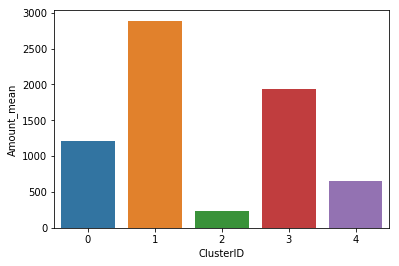

In [76]:
sns.barplot(x=df.ClusterID,y=df.Amount_mean)

# Here each graph has the cluster number on the x axis ,where as value of Recency,frequency and monetary is on the y axis


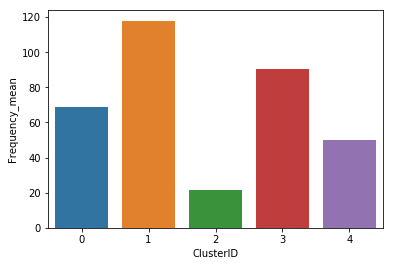

In [77]:
sns.barplot(x=df.ClusterID,y=df.Frequency_mean)

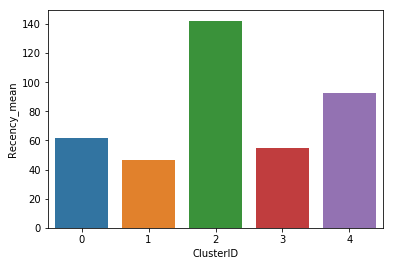

In [78]:
sns.barplot(x=df.ClusterID,y=df.Recency_mean)

#  WE FOUND THAT CUSTOMER IN CLUSTER 2 ARE REALLY IMORTANT AS THEIR FREUENCY OF PURCHASE IS VERY HIGH AND GIVING GOOD BUSSINESS AND THEY ARE RECENT PURCHASER AS WELL

WE learned how to create clusters using the K-means algorithm.
We wanted to group the customers of the store into different clusters based on their purchasing habits. The different stage involved are

1. Missing Value Treatment
2 Data Transformation
3.Outlier treatment 
4.Data Standardization
5.Finding the optimal value of k
6. Implementing K means Algorithm
7. Analysing the cluster of customers to obtain business insights

Once we are through with the data prepration,the K means algorithm is quite easy to implement.All it takes is running the KmMean function()


# Heirchical Clustering

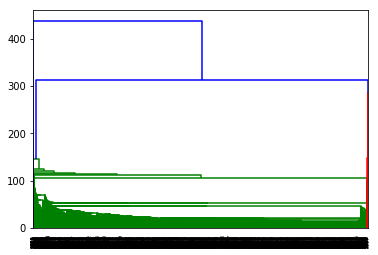

In [80]:
# heirchichal Clustering
mergings = linkage(RFM_normal,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

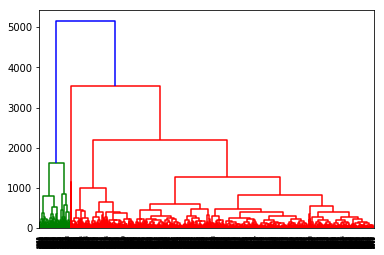

In [81]:
mergings = linkage(RFM_normal,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [82]:
clusterCut = pd.Series(cut_tree(mergings,n_clusters=5).reshape(-1,))
RFM_hc = pd.concat([RFM,clusterCut],axis=1)
RFM_hc.columns = ['CustomerID','Frequency','Amount','Recency','ClusterID']

In [83]:
# After we got the cluster id for each customer we then append the obtained cluster id to the rfm data set and analysed the 
#characteristics of each cluster to derive the business insights from the different customer segments or clusters ,in the same 
#way as you did for the k means  algorithm

In [87]:
# summarise 
RFM_hc.Recency = RFM_hc.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [88]:
df_hc = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount,km_clusters_frequency,km_clusters_recency],axis=1)
df_hc.columns = ['ClusterID','Amount_mean','Frequency_mean','Recency_mean']
df_hc.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,1208.826377,68.591497,61.591497
1,1,2888.302675,117.905759,46.670157
2,2,231.800514,21.529375,142.280148
3,3,1936.260578,90.215805,55.003040
4,4,657.144789,49.866738,92.407249


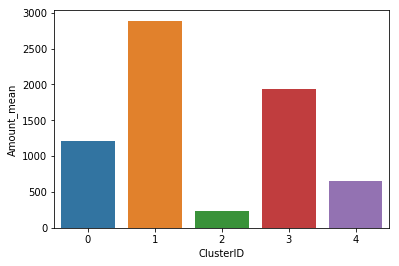

In [89]:
sns.barplot(x=df_hc.ClusterID,y=df_hc.Amount_mean)

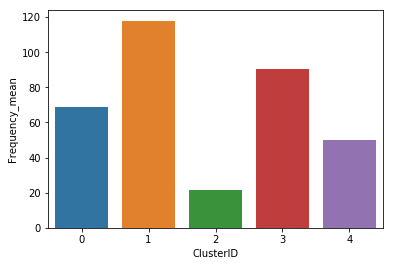

In [90]:
sns.barplot(x=df_hc.ClusterID,y=df_hc.Frequency_mean)

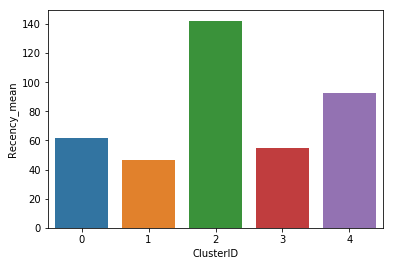

In [91]:
sns.barplot(x=df.ClusterID,y=df.Recency_mean)